In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Загрузка данных из CSV файла
data = pd.read_csv('/Users/evgenii/Documents/GitHub/perfconf/perfcong-jmeter-examples/data_api/ar_api.jtl', low_memory=False)

# Преобразование времени в читаемый формат, если необходимо
data['timeStamp'] = pd.to_datetime(data['timeStamp'], unit='ms')

# Фильтрация по столбцу sampleLabel
sample_labels = data['label'].unique()

## Диаграммы плотности

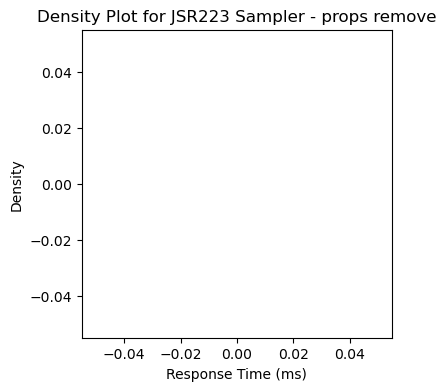

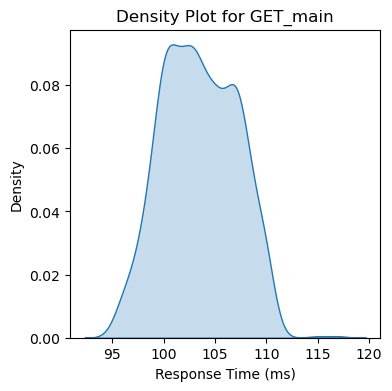

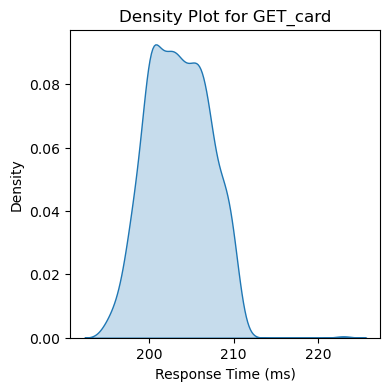

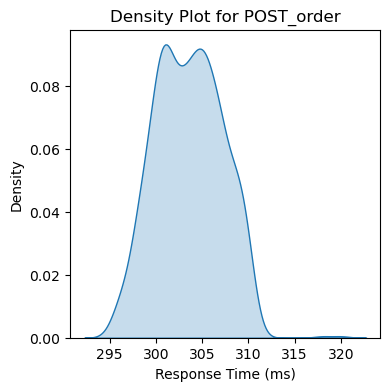

In [3]:
# Итерация по каждому уникальному sampleLabel
for label in sample_labels:
    subset = data[data['label'] == label]  # Фильтрация по метке

    # Построение диаграммы плотности
    plt.figure(figsize=(4, 4))
    sns.kdeplot(subset['elapsed'], fill=True)
    plt.title(f'Density Plot for {label}')
    plt.xlabel('Response Time (ms)')
    plt.ylabel('Density')
    plt.show()

In [4]:
# Нормализация responseTime
scaler = StandardScaler()

# Применение нормализации для каждого sampleLabel
for label in sample_labels:
    subset = data[data['label'] == label]
    subset['responseTime_normalized'] = scaler.fit_transform(subset[['elapsed']])
    
    # Обновляем данные после нормализации
    data.loc[data['label'] == label, 'responseTime_normalized'] = subset['responseTime_normalized']


In [5]:
data

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect,responseTime_normalized
0,2024-08-11 21:23:36.583,484,JSR223 Sampler - props remove,200,OK,setUp Thread Group 1-1,text,True,NaN,4,0,1,1,NaN,0,0,0,0.000000
1,2024-08-11 21:23:37.229,106,GET_main,200,OK,Thread Group - baseline 1-1,text,True,NaN,114,0,11,11,NaN,3,0,2,0.705530
2,2024-08-11 21:23:37.242,99,GET_main,200,OK,Thread Group - baseline 1-2,text,True,NaN,114,0,12,12,NaN,23,0,1,-1.246529
3,2024-08-11 21:23:37.252,107,GET_main,200,OK,Thread Group - baseline 1-3,text,True,NaN,114,0,13,13,NaN,22,0,1,0.984395
4,2024-08-11 21:23:37.260,100,GET_main,200,OK,Thread Group - baseline 1-4,text,True,NaN,114,0,13,13,NaN,20,0,5,-0.967663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,2024-08-11 21:23:43.977,304,POST_order,200,OK,Thread Group - baseline 1-98,text,True,NaN,114,0,5,5,NaN,20,0,3,0.126399
2997,2024-08-11 21:23:43.988,299,POST_order,200,OK,Thread Group - baseline 1-96,text,True,NaN,114,0,4,4,NaN,23,0,4,-1.262599
2998,2024-08-11 21:23:44.000,301,POST_order,200,OK,Thread Group - baseline 1-97,text,True,NaN,114,0,3,3,NaN,2,0,2,-0.707000
2999,2024-08-11 21:23:44.043,303,POST_order,200,OK,Thread Group - baseline 1-100,text,True,NaN,114,0,2,2,NaN,49,0,4,-0.151401


Sample Label: JSR223 Sampler - props remove
Number of clusters found: 0
Clusters: [-1]



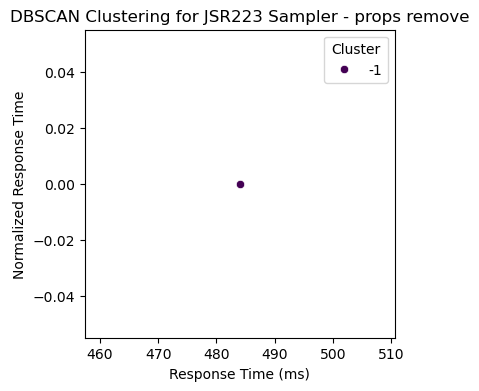

Sample Label: GET_main
Number of clusters found: 1
Clusters: [-1  0]



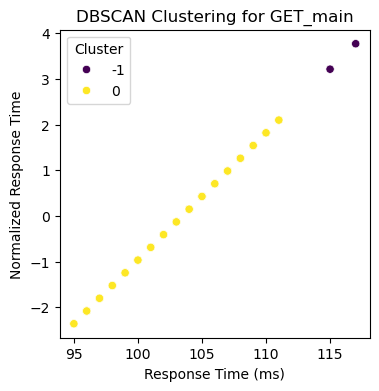

Sample Label: GET_card
Number of clusters found: 1
Clusters: [-1  0]



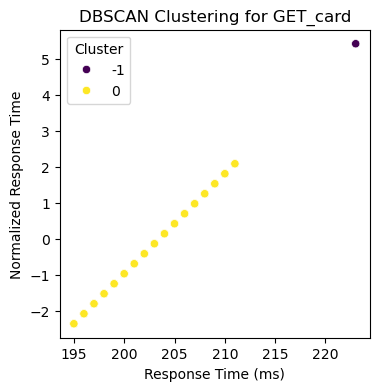

Sample Label: POST_order
Number of clusters found: 1
Clusters: [-1  0]



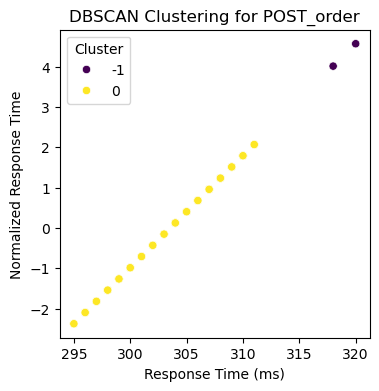

In [7]:
# Настройка параметров DBSCAN
eps = 0.5  # радиус окружности для определения плотности
min_samples = 20  # минимальное количество точек для формирования кластера

# Кластеризация данных для каждого sampleLabel
for label in sample_labels:
    subset = data[data['label'] == label]
    X = subset[['responseTime_normalized']].values
    
    # Применение DBSCAN
    db = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = db.fit_predict(X)
    
    # Добавление кластерных меток к подмножеству данных
    subset['cluster'] = clusters
    
    # Обновление данных
    data.loc[data['label'] == label, 'cluster'] = subset['cluster']
    
    # Определение количества уникальных кластеров (исключая -1, который обозначает шум)
    n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
    
    # Вывод информации в консоль
    print(f'Sample Label: {label}')
    print(f'Number of clusters found: {n_clusters}')
    print(f'Clusters: {np.unique(clusters)}')
    print()

# Визуализация
    plt.figure(figsize=(4, 4))
    sns.scatterplot(x=subset['elapsed'], y=subset['responseTime_normalized'], hue=subset['cluster'], palette='viridis', legend='full')
    plt.title(f'DBSCAN Clustering for {label}')
    plt.xlabel('Response Time (ms)')
    plt.ylabel('Normalized Response Time')
    plt.legend(title='Cluster')
    plt.show()


In [25]:
print(data[['label', 'elapsed', 'responseTime_normalized', 'cluster']])


                              label  elapsed  responseTime_normalized  cluster
0     JSR223 Sampler - props remove      484                 0.000000     -1.0
1                          GET_main      106                 0.705530      0.0
2                          GET_main       99                -1.246529      0.0
3                          GET_main      107                 0.984395      0.0
4                          GET_main      100                -0.967663      0.0
...                             ...      ...                      ...      ...
2996                     POST_order      304                 0.126399      0.0
2997                     POST_order      299                -1.262599      0.0
2998                     POST_order      301                -0.707000      0.0
2999                     POST_order      303                -0.151401      0.0
3000                     POST_order      307                 0.959797      0.0

[3001 rows x 4 columns]
